<a href="https://colab.research.google.com/github/rashmic20/Phase4_Project/blob/main/DeepLearning%20updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multilayer perceptron (MLP) neural network that predicts whether a customer will respond to a campaign or not.

###Data Loading and Preprocessing

In [ ]:
import pandas as pd

# Load the data with the correct delimiter
data = pd.read_csv('marketing_campaign.csv', delimiter=';')

# Display the first few rows of the dataset
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Find the most recent date in the dataset
most_recent_date = data['Dt_Customer'].max()

# Create a new feature: the number of days since the customer joined
data['Customer_Since_Days'] = (most_recent_date - data['Dt_Customer']).dt.days

# Drop the original Dt_Customer column since it's no longer needed
data = data.drop(columns=['Dt_Customer'])

In [ ]:
# Assuming the target variable is named 'target'
print(data['Response'].value_counts())

Response
0    1906
1     334
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data

# Separate features and target
X = data.drop(columns=['Response'])  # Features
y = data['Response']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_smote).value_counts())

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Response
1    1501
0    1501
Name: count, dtype: int64


In [22]:
# Check the new class distribution
print(pd.Series(y_train_smote).value_counts())

Response
1    1501
0    1501
Name: count, dtype: int64


###Step 2: Define the Model
Let’s define a simple neural network using Keras.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

# Define the model with batch normalization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5289 - loss: 0.7935 - val_accuracy: 0.8371 - val_loss: 0.5303
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.5052 - val_accuracy: 0.8652 - val_loss: 0.4199
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8577 - loss: 0.3876 - val_accuracy: 0.8764 - val_loss: 0.3637
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.3340 - val_accuracy: 0.8596 - val_loss: 0.3396
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8961 - loss: 0.2977 - val_accuracy: 0.8652 - val_loss: 0.3175
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9095 - loss: 0.2601 - val_accuracy: 0.8652 - val_loss: 0.3101
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8957 - loss: 0.2597 - val_accuracy: 0.8820 - val_loss: 0.3042
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9144 - loss: 0.2162 - val_accuracy: 0.8764 - v

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,677 (49.52 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 8,324 (32.52 KB)

###Step 3: Train the Model
Now, we will train the model using the training data.

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8792 - loss: 0.2903 - val_accuracy: 0.8901 - val_loss: 0.2745
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8714 - loss: 0.3061 - val_accuracy: 0.8901 - val_loss: 0.2777
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8726 - loss: 0.2909 - val_accuracy: 0.8901 - val_loss: 0.2776
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8728 - loss: 0.2854 - val_accuracy: 0.8873 - val_loss: 0.2806
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8904 - loss: 0.2832 - val_accuracy: 0.8845 - val_loss: 0.2819
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8891 - loss: 0.2759 - val_accuracy: 0.8845 - val_loss: 0.2817
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.2853 - val_accuracy: 0.8930 - val_loss: 0.2801
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8881 - loss: 0.2685 - val_accuracy: 0.8845 - val_loss:

###Step 4: Make Predictions
After training, we can use the model to predict on the test data.

In [24]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Binary classification (0 or 1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


###Step 5: Evaluate the Model
We can now evaluate the model by calculating accuracy and other metrics such as confusion matrix, precision, recall, and F1-score.

Accuracy: 0.8806
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.63      0.35      0.45        62

    accuracy                           0.88       444
   macro avg       0.77      0.66      0.69       444
weighted avg       0.86      0.88      0.87       444



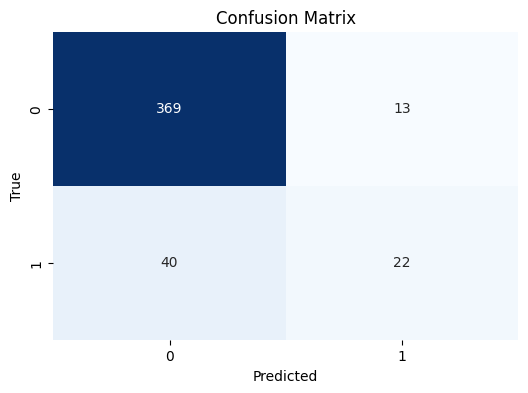

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' are the true labels and 'y_pred' are the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'y_test' is not defined

###Model Evaluation:

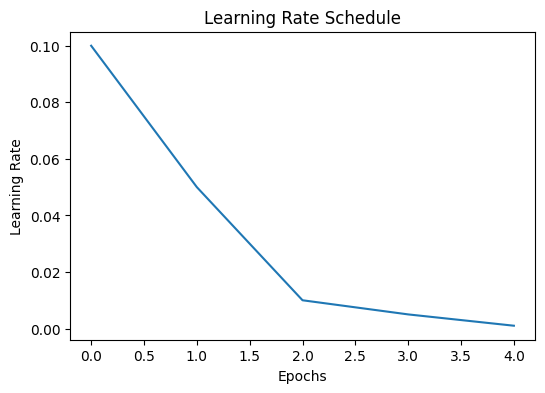

In [32]:
# Example learning rate schedule
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]  # This can be extracted during training

# Plot learning rate schedule
plt.figure(figsize=(6, 4))
plt.plot(range(len(learning_rates)), learning_rates)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

The learning rate schedule shows how the learning rate changes over time during training. In this case, the learning rate starts at 0.1 and gradually decreases to 0.001. By gradually reducing the learning rate, the model can fine-tune its weights more precisely as it progresses through training.

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9887 - loss: 0.0386 - val_accuracy: 0.8258 - val_loss: 0.7020
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0240 - val_accuracy: 0.8371 - val_loss: 0.7304
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0306 - val_accuracy: 0.8371 - val_loss: 0.7755
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.8258 - val_loss: 0.7803
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.8258 - val_loss: 0.7248
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0193 - val_accuracy: 0.8315 - val_loss: 0.6498
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0222 - val_accuracy: 0.8315 - val_loss: 0.6775
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0320 - val_accuracy: 0.8371 - val_loss:

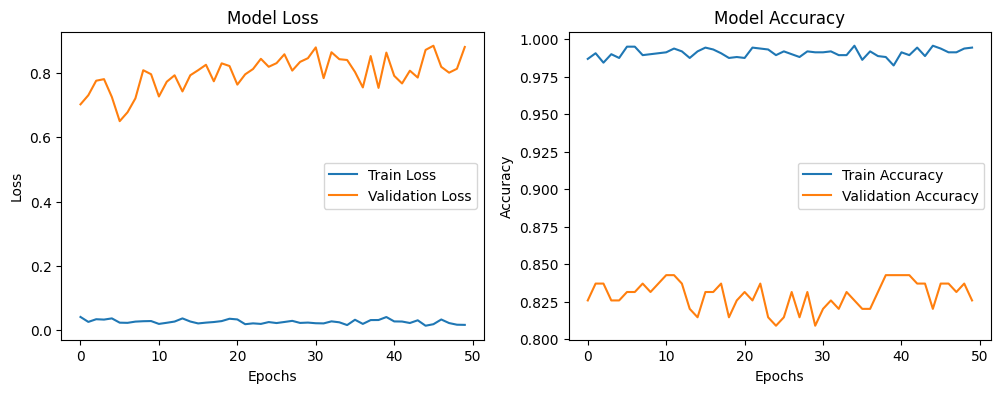

In [ ]:
import matplotlib.pyplot as plt

# Assuming you're using Keras and have history object after training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The model is likely overfitting because it achieves very low training loss and high training accuracy, while the validation loss remains high and the validation accuracy fluctuates and is lower.

In [33]:
from tensorflow.keras import regularizers
#Assuming X_train is your training data and has been preprocessed
input_shape = X_train.shape[1]  # Number of features in your dataset


# Add L2 regularization to the Dense layers
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(input_shape,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.5))  # Drop 50% of the neurons during training
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define the model with additional regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))

# Optimizer
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5584 - loss: 0.9053 - val_accuracy: 0.7865 - val_loss: 0.5830
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6527 - loss: 0.7360 - val_accuracy: 0.8764 - val_loss: 0.4607
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7241 - loss: 0.6006 - val_accuracy: 0.8820 - val_loss: 0.4012
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7422 - loss: 0.5527 - val_accuracy: 0.8876 - val_loss: 0.3678
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.4688 - val_accuracy: 0.8820 - val_loss: 0.3421
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.4894 - val_accuracy: 0.8820 - val_loss: 0.3293
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.4169 - val_accuracy: 0.8876 - val_loss: 0.3255
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.4086 - val_accuracy: 0.8933 - v

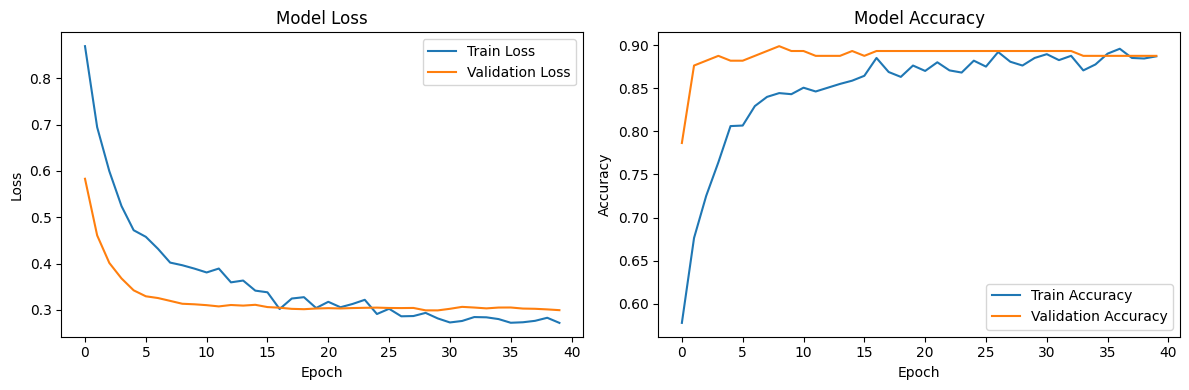

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the fit function of your model
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

The model is performing well on both the training and validation sets with no significant overfitting observed. The close tracking of validation metrics with training metrics suggests that the model has generalized well.

#### Key Changes
Dropout: Added dropout layers with a rate of 0.5 after each batch normalization. This randomly sets input units to 0 during training, which helps prevent neurons from co-adapting too much.

Early Stopping: Included an EarlyStopping callback that monitors the validation loss and will stop the training if the validation loss does not improve for 10 consecutive epochs. It also restores the weights from the best epoch.

Optimizer: Specified the learning rate for the Adam optimizer. This gives you more control over the optimization process, and you might want to experiment with different rates.

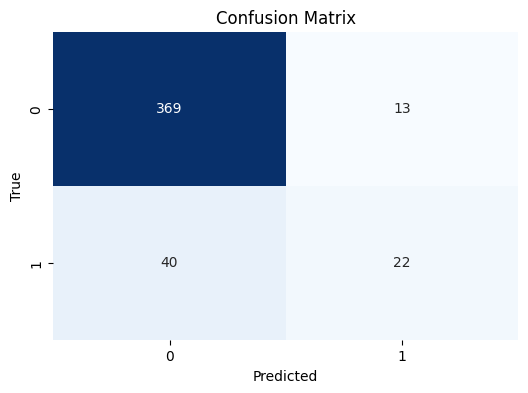

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' are the true labels and 'y_pred' are the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
# Define a deeper model with more hidden layers
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile and train the deeper model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7123 - loss: 0.5539 - val_accuracy: 0.8732 - val_loss: 0.3533
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8737 - loss: 0.3174 - val_accuracy: 0.8789 - val_loss: 0.3159
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9028 - loss: 0.2742 - val_accuracy: 0.8732 - val_loss: 0.2954
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8918 - loss: 0.2608 - val_accuracy: 0.8648 - val_loss: 0.3132
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.2341 - val_accuracy: 0.8845 - val_loss: 0.2976
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9162 - loss: 0.2042 - val_accuracy: 0.8817 - val_loss: 0.2966
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9235 - loss: 0.2030 - val_accuracy: 0.8817 - val_loss: 0.3057
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9287 - loss: 0.1795 - val_accuracy: 0.8930 - val_loss: 0.3363
Ep

In [37]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate model
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validated scores: {scores}')

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_6, built=True> does not.

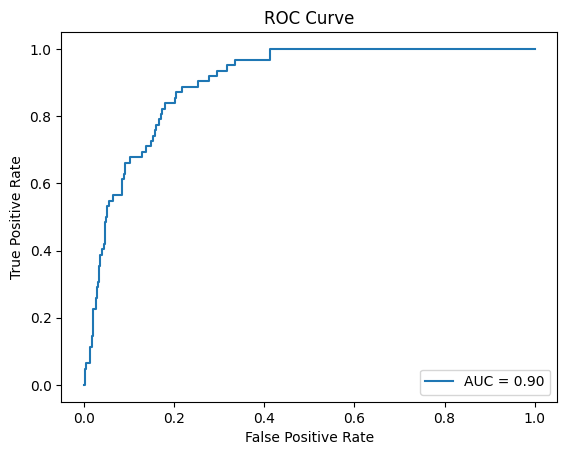

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model(optimizer='adam', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model into KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define hyperparameters to tune
param_grid = {'batch_size': [32, 64],
              'epochs': [20, 30],
              'optimizer': ['adam', 'rmsprop'],
              'neurons': [64, 128]}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')


ModuleNotFoundError: No module named 'keras.wrappers'

In [3]:
# Imports
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(optimizer='adam', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model into a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [20, 30],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [64, 128]
}

# Initialize GridSearchCV with the model and the parameter grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit GridSearchCV to the data (assuming X_train and y_train are pre-defined)
grid_result = grid.fit(X_train, y_train)

# Output the best parameters and the best score
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [1]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier  # Changed import statement
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(optimizer='adam', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model into a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [20, 30],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [64, 128]
}

# Initialize GridSearchCV with the model and the parameter grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit GridSearchCV to the data (assuming X_train and y_train are pre-defined)
grid_result = grid.fit(X_train, y_train)

# Output the best parameters and the best score
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

ModuleNotFoundError: No module named 'scikeras'